In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/HEMA

/content/drive/MyDrive/HEMA


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196
!pip install roboflow

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/drive/MyDrive/HEMA
/content/drive/MyDrive/HEMA/datasets


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="vvl94M7Bo60rC3KDgmzc")
project = rf.workspace("dronacharya-college-of-engineering").project("yolo-unszn")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo-3 in yolov8:: 100%|██████████| 1846/1846 [00:14<00:00, 126.90it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/HEMA/datasets/yolo-3/data.yaml epochs=250 imgsz=1024 plots=True

100% 21.5M/21.5M [00:00<00:00, 144MB/s]
New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/HEMA/datasets/yolo-3/data.yaml, epochs=250, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre


image 1/1 /content/car.png: 640x1024 1 Number-Plate, 21.4ms
Speed: 4.8ms preprocess, 21.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1024)


[     426.23      247.85      574.85      295.91]
426 247


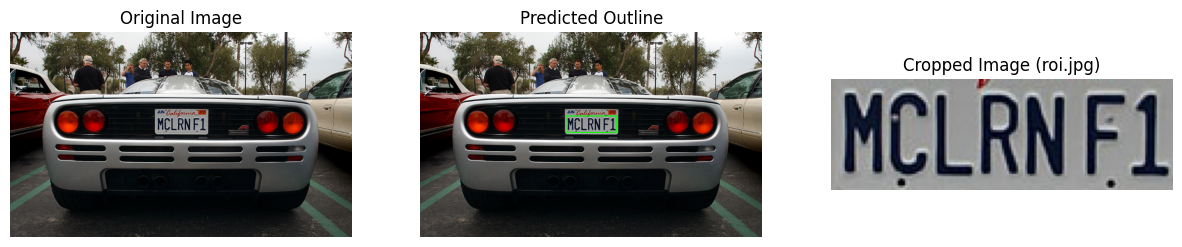

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('/content/drive/MyDrive/HEMA/datasets/runs/detect/train/weights/best.pt')
IMG = "/content/car.png"

results = model(IMG)
for result in results:
    bounding_boxes = result.boxes.xyxy[0].cpu().numpy()
    print(bounding_boxes)


    x_min = int(bounding_boxes[0])
    y_min = int(bounding_boxes[1])
    x_max = int(bounding_boxes[2])
    y_max = int(bounding_boxes[3])
    print(f"{x_min} {y_min}")

original_image = cv2.imread(IMG)

draw_image = original_image.copy()

cv2.rectangle(draw_image, (x_min, y_max), (x_max, y_min), (0, 255, 0), 2)

cropped_image = original_image[y_min:y_max, x_min:x_max]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

axs[1].imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Predicted Outline')

cv2.imwrite('predicted.jpg', draw_image)
axs[2].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Cropped Image (roi.jpg)')

for ax in axs:
    ax.axis('off')

cv2.imwrite('roi.jpg', cropped_image)

plt.show()